In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense ,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

In [12]:
x,y=make_circles(n_samples=100,noise=.1,random_state=1)

<Axes: >

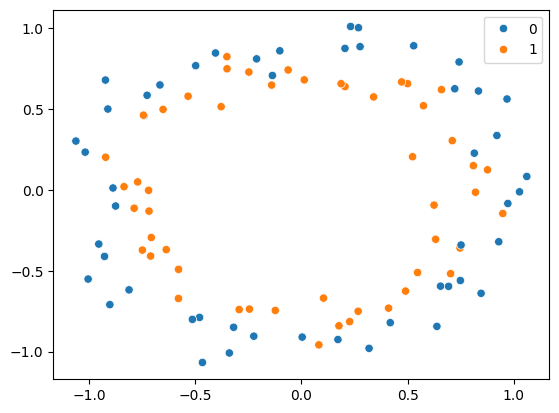

In [14]:
import seaborn as sns

sns.scatterplot(x=x[:, 0], y=x[:, 1], hue=y)

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)

In [16]:
model=Sequential()
model.add(Dense(256,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

c:\Users\Adeel\Desktop\Deep Learning\Deep_learning\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,025 (4.00 KB)

 Trainable params: 1,025 (4.00 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [40]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=500,verbose=0)
print(history)

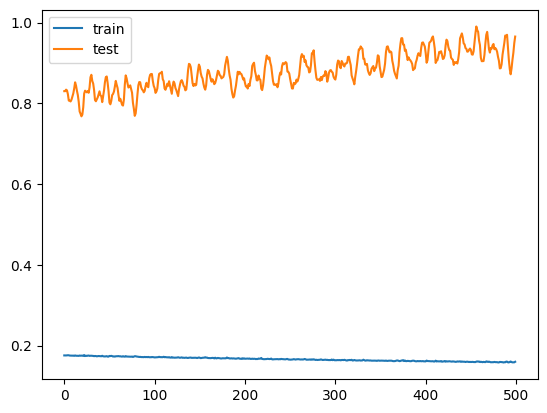

In [41]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step


<Axes: >

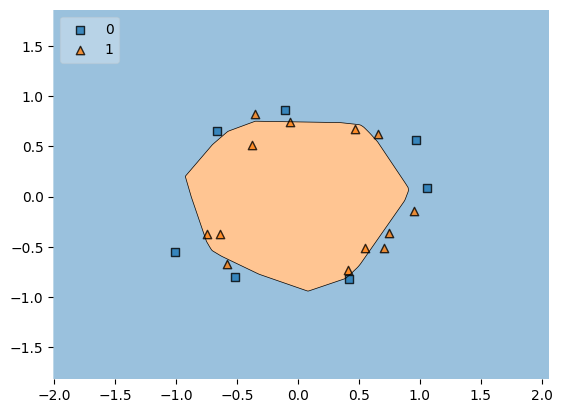

In [42]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x_test,y_test.ravel(),clf=model,legend=2)

# Early stopping

In [31]:
callback=EarlyStopping(monitor='val_loss',
                       min_delta=.0001,
                       patience=20,
                       verbose=1,
                       mode='auto',
                       baseline=None,
                       restore_best_weights=False
                       )

In [43]:
history_1=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=50,callbacks=callback)
print(history_1)

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step - accuracy: 0.9391 - loss: 0.1530 - val_accuracy: 0.7000 - val_loss: 0.9660
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.9195 - loss: 0.1725 - val_accuracy: 0.7000 - val_loss: 0.9466
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.9258 - loss: 0.1640 - val_accuracy: 0.7000 - val_loss: 0.9113
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.9117 - loss: 0.1635 - val_accuracy: 0.7000 - val_loss: 0.8888
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.9234 - loss: 0.1639 - val_accuracy: 0.7000 - val_loss: 0.8875
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.9508 - loss: 0.1291 - val_accuracy: 0.7000 - val_loss: 0.8942
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.9430 - loss: 0.1441 - val_accuracy: 0.7000 - val_loss: 0.9087
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.9117 - loss: 0.1767 - val_accuracy: 0.7000 - val_loss: 0.9259

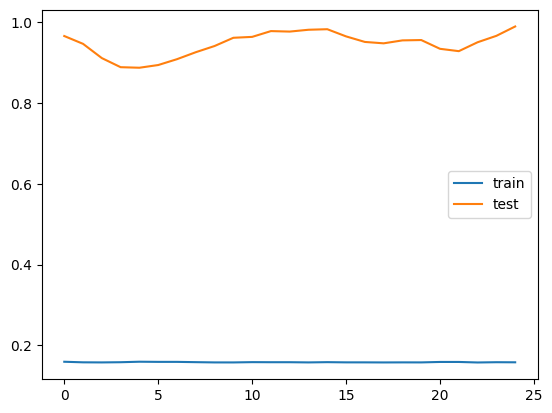

In [44]:
plt.plot(history_1.history['loss'],label='train')
plt.plot(history_1.history['val_loss'],label='test')
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step


<Axes: >

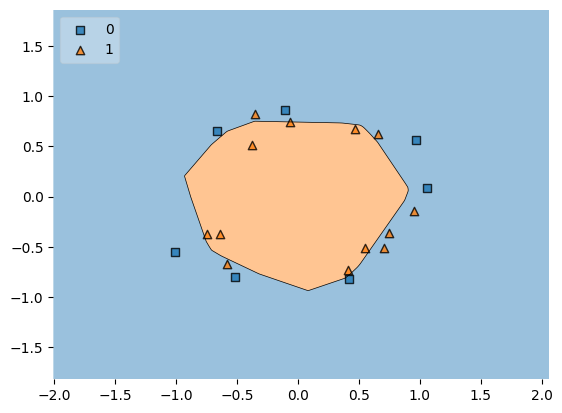

In [45]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x_test,y_test.ravel(),clf=model,legend=2)